<a href="https://colab.research.google.com/github/pmdino/CS39AA-Project/blob/main/CS39AA_Project_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this project is to create a NLP model to detect unreliable news articles from the title, author, and full text. In the dataset, entries are labeled with 0 as reliable and 1 as unreliable. The articles are from around the time of the 2016 US Presidential election for context.

In [1]:
!mkdir mydata
!cp -r /content/drive/MyDrive/data/trainnews.csv /content/mydata

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('stopwords')

news_data = pd.read_csv("./mydata/trainnews.csv")
news_data.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [4]:
news_data.shape

(20800, 5)

In [5]:
news_data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [7]:
news_data = news_data.fillna('')

news_data.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [8]:
news_data['word_count'] = news_data['text'].apply(lambda x: len(str(x).split()))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd09fb3c90>]],
      dtype=object)

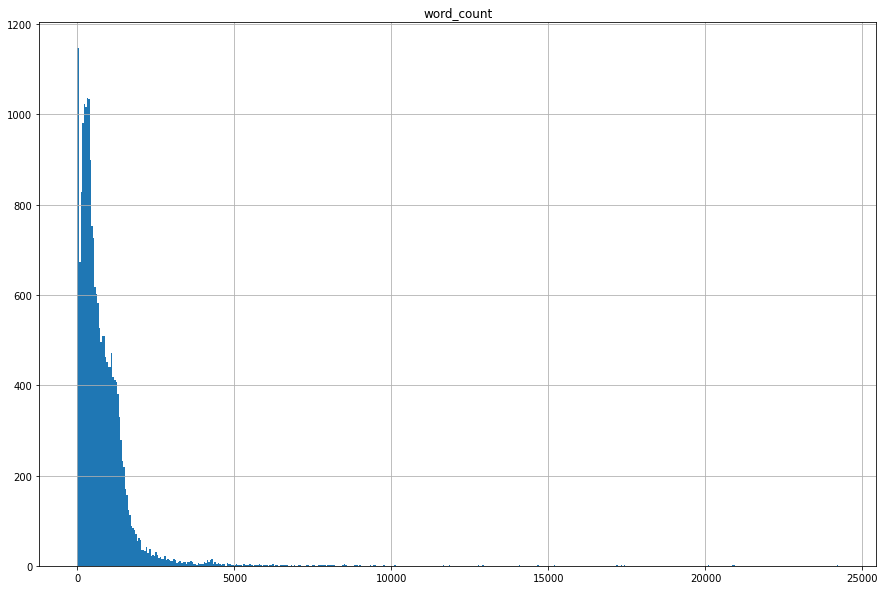

In [9]:
news_data[['word_count']].hist(bins=500, figsize=(15, 10))

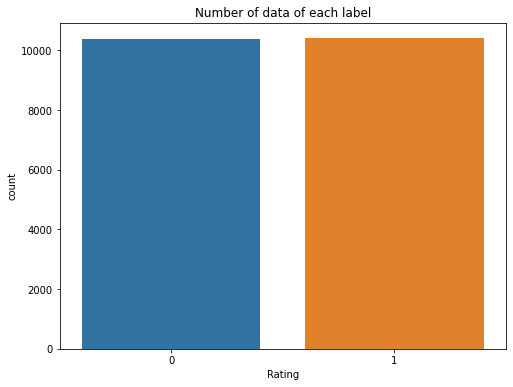

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=news_data)
plt.xlabel("Rating")
plt.title("Number of data of each label")
plt.show()

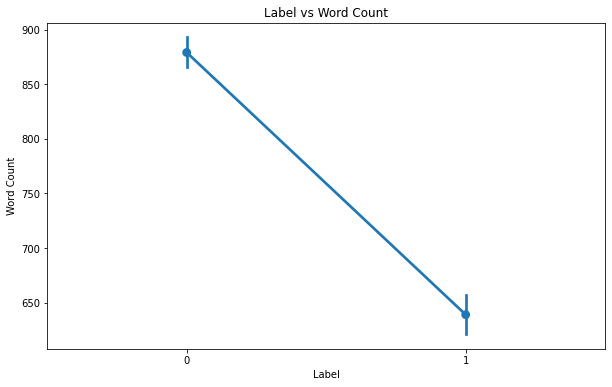

In [11]:
plt.figure(figsize=(10, 6))
sns.pointplot(x = "label", y = "word_count", data = news_data)
plt.xlabel("Label")
plt.ylabel("Word Count")
plt.title("Label vs Word Count")
plt.show()

In [19]:
dfFake = news_data.loc[news_data['label'] == 1, 'text']
dfTrue = news_data.loc[news_data['label'] == 0, 'text']

Most common words in reliable articles

In [22]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words_real = get_top_n_words(dfTrue, 20)
for word, freq in common_words_real:
    print(word, freq)
df2 = pd.DataFrame(common_words_real, columns = ['word' , 'count'])

said 68179
mr 64571
trump 36111
people 19942
new 19661
president 16829
like 16022
ms 12395
time 11879
just 11576
state 11483
years 11401
states 11058
united 10194
year 10185
news 9421
did 9278
american 9094
government 8655
house 8343


Most common words in unreliable articles

In [24]:
common_words_fake = get_top_n_words(dfFake, 20)
for word, freq in common_words_fake:
    print(word, freq)
df2 = pd.DataFrame(common_words_fake, columns = ['word' , 'count'])

trump 20147
clinton 19254
people 16598
hillary 12762
said 11875
just 10488
new 10395
like 10319
time 9235
world 9180
state 8906
2016 8548
president 8508
election 8263
government 8145
war 7625
obama 7547
american 6976
russia 6742
states 6567
